In [1]:
from bddmodel import BDDModel, SimpleBDDModel
import tensorflow as tf
from bddfunc import training_batcher
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import datetime

In [3]:
# load in validation data
x1 = np.load(open('./test_img_pixnum2000_0.npy', 'rb'))
l1 = np.load(open('./test_label_pixnum2000_0.npy', 'rb'))

In [27]:
enc = OneHotEncoder(sparse=False, categories=[np.arange(10)])
l2 = enc.fit_transform(np.reshape(l1, (-1,1)))

In [46]:
tf.reset_default_graph()

In [47]:
# Train Model
restorer = tf.train.import_meta_graph('./tmp/model3_2019-06-07_epoch3.ckpt.meta')
saver = tf.train.Saver()  


In [48]:
tf.global_variables()

[<tf.Variable 'feature_map/conv1/kernel:0' shape=(7, 7, 3, 96) dtype=float32_ref>,
 <tf.Variable 'feature_map/conv1/bias:0' shape=(96,) dtype=float32_ref>,
 <tf.Variable 'feature_map/conv2/kernel:0' shape=(3, 3, 96, 256) dtype=float32_ref>,
 <tf.Variable 'feature_map/conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'feature_map/conv3/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>,
 <tf.Variable 'feature_map/conv3/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'classifier/fconv1/kernel:0' shape=(19, 19, 512, 3072) dtype=float32_ref>,
 <tf.Variable 'classifier/fconv1/bias:0' shape=(3072,) dtype=float32_ref>,
 <tf.Variable 'classifier/fconv2/kernel:0' shape=(1, 1, 3072, 4096) dtype=float32_ref>,
 <tf.Variable 'classifier/fconv2/bias:0' shape=(4096,) dtype=float32_ref>,
 <tf.Variable 'classifier/class_out/kernel:0' shape=(1, 1, 4096, 10) dtype=float32_ref>,
 <tf.Variable 'classifier/class_out/bias:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' sha

In [49]:
for i in tf.get_default_graph().get_operations():
    print(i.name)

Placeholder
Placeholder_1
Placeholder_2
feature_map/conv1/kernel/Initializer/random_uniform/shape
feature_map/conv1/kernel/Initializer/random_uniform/min
feature_map/conv1/kernel/Initializer/random_uniform/max
feature_map/conv1/kernel/Initializer/random_uniform/RandomUniform
feature_map/conv1/kernel/Initializer/random_uniform/sub
feature_map/conv1/kernel/Initializer/random_uniform/mul
feature_map/conv1/kernel/Initializer/random_uniform
feature_map/conv1/kernel
feature_map/conv1/kernel/Assign
feature_map/conv1/kernel/read
feature_map/conv1/bias/Initializer/zeros
feature_map/conv1/bias
feature_map/conv1/bias/Assign
feature_map/conv1/bias/read
feature_map/conv1/dilation_rate
feature_map/conv1/Conv2D
feature_map/conv1/BiasAdd
feature_map/act1
feature_map/maxpool1/MaxPool
feature_map/conv2/kernel/Initializer/random_uniform/shape
feature_map/conv2/kernel/Initializer/random_uniform/min
feature_map/conv2/kernel/Initializer/random_uniform/max
feature_map/conv2/kernel/Initializer/random_uniform/

In [50]:
output = tf.get_default_graph().get_operation_by_name("accuracy")
X_in = tf.get_default_graph().get_tensor_by_name("Placeholder:0")
Y_in = tf.get_default_graph().get_tensor_by_name("Placeholder_1:0")

In [51]:
t1 = tf.global_variables()[0]
sess = tf.Session()
restorer.restore(sess,'./tmp/model3_2019-06-07_epoch3.ckpt')

INFO:tensorflow:Restoring parameters from ./tmp/model3_2019-06-07_epoch3.ckpt


In [71]:
output = tf.get_default_graph().get_tensor_by_name("classifier/class_out_squeeze:0")

In [72]:
output

<tf.Tensor 'classifier/class_out_squeeze:0' shape=<unknown> dtype=float32>

In [114]:
st = 120
end = st + 20
yolo = sess.run(output, feed_dict={X_in: x1[st:end], Y_in:l2[st:end]})

In [115]:
yolo2 = np.argmax(yolo, axis=-1)

In [116]:
import matplotlib.pyplot as plt

In [117]:
mapper =  ['bike', 'bus', 'car', 'motor', 'person', 'rider',   'traffic light', 'traffic sign', 'train', 'truck']

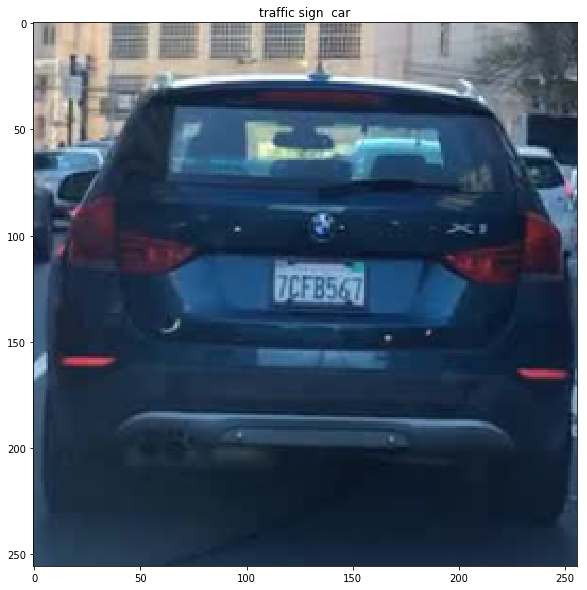

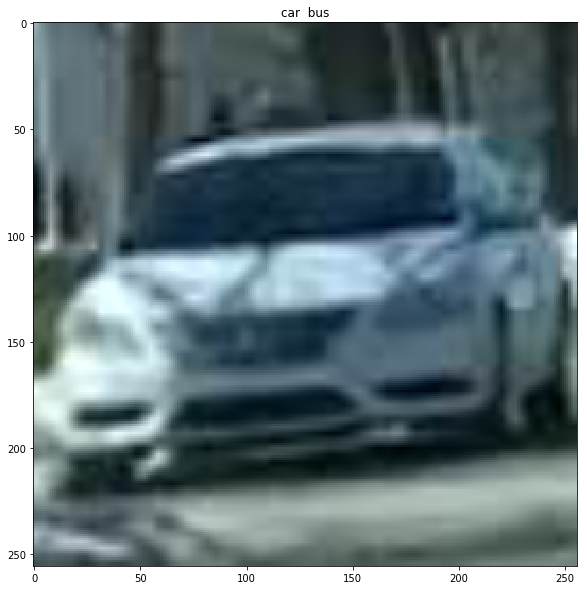

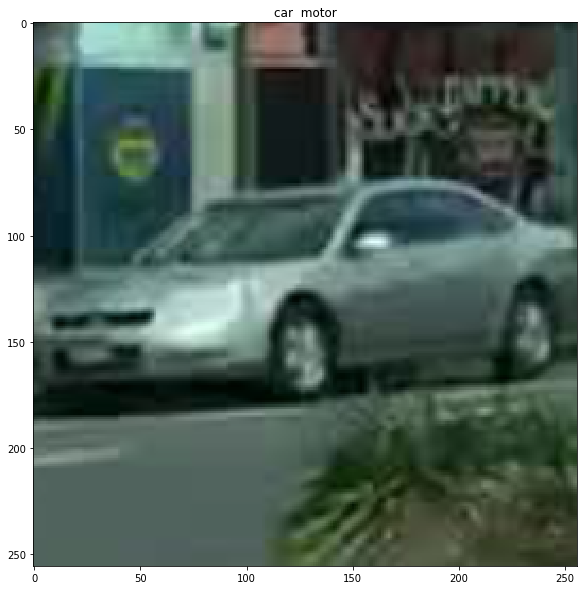

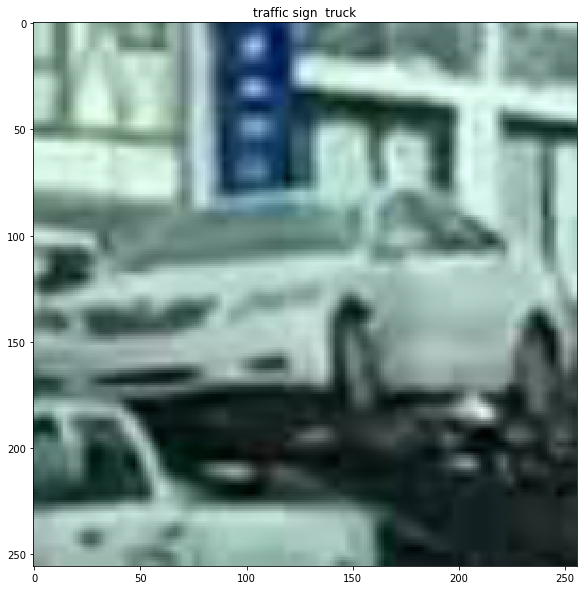

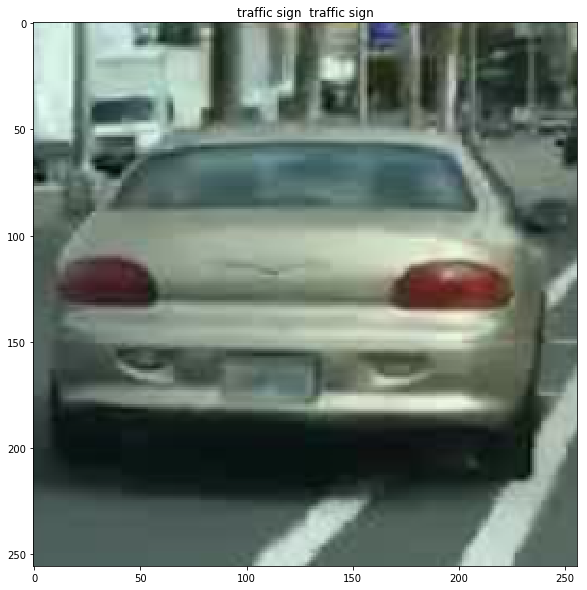

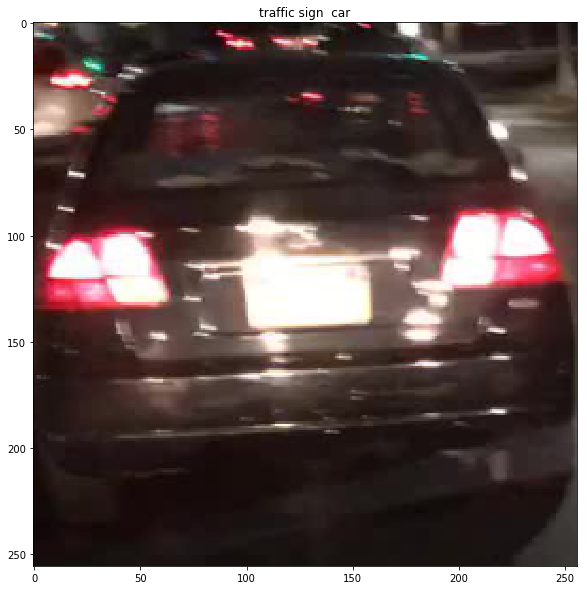

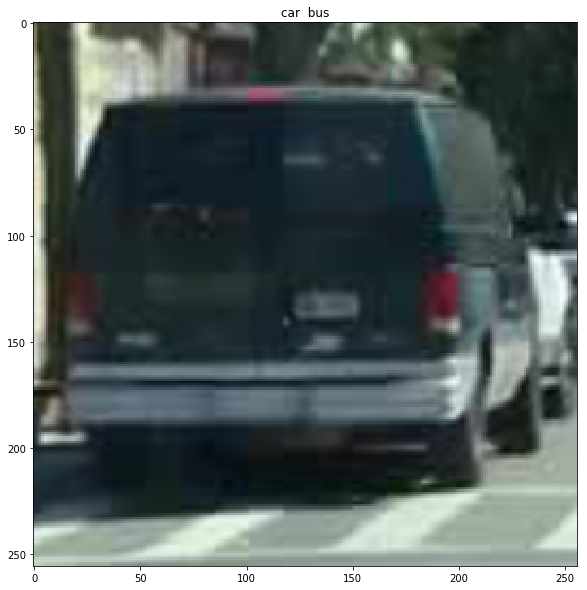

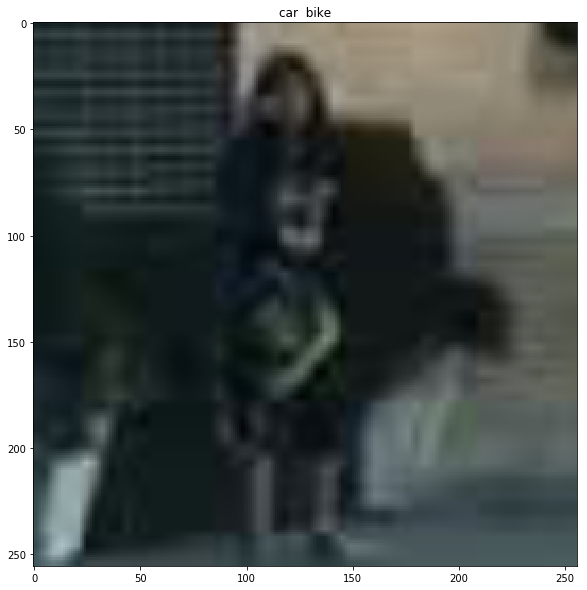

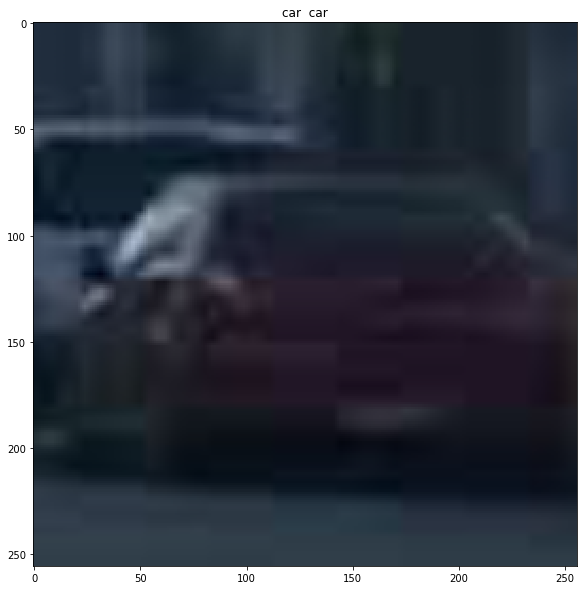

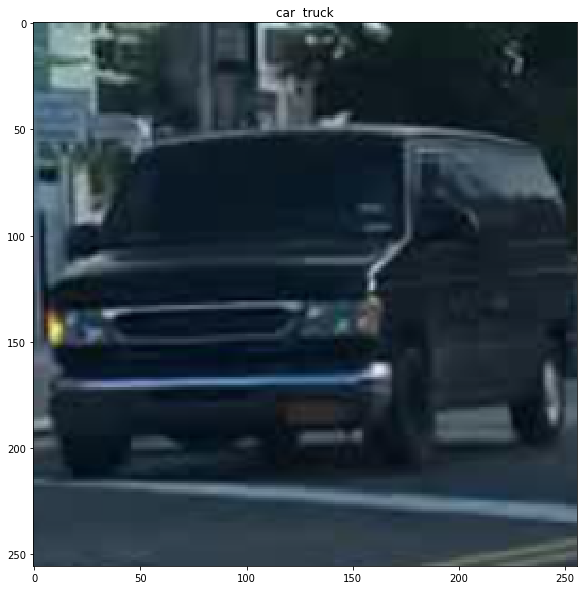

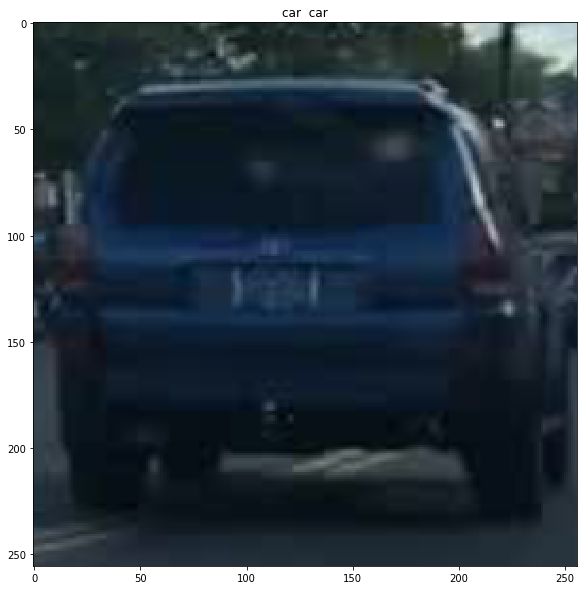

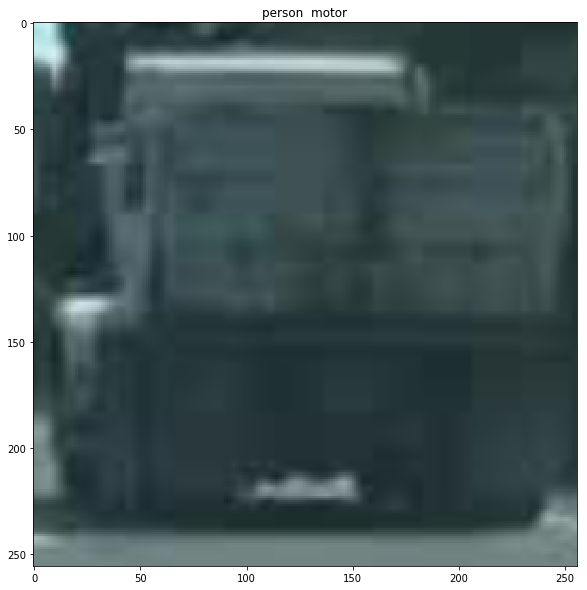

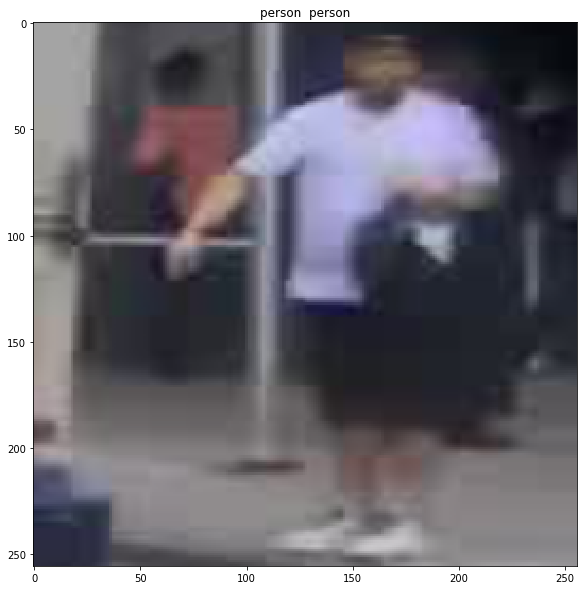

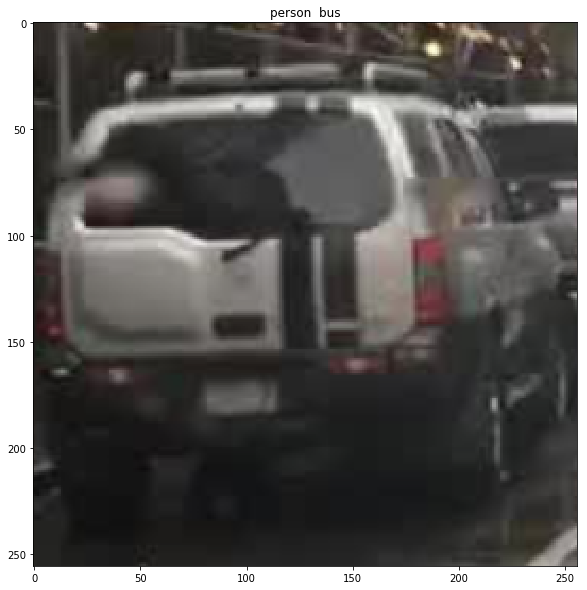

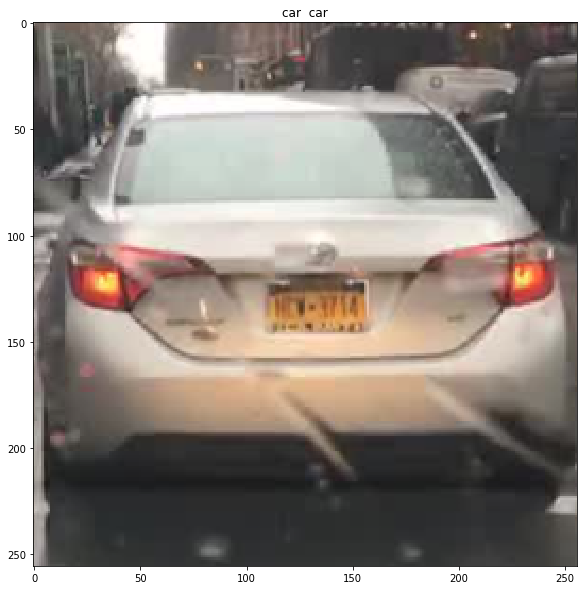

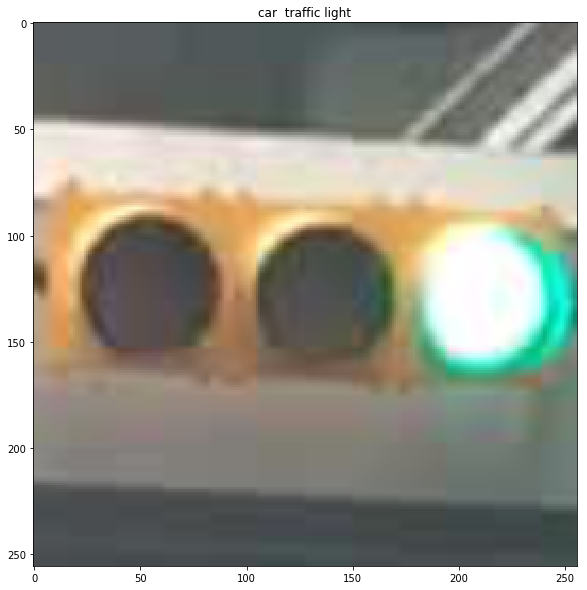

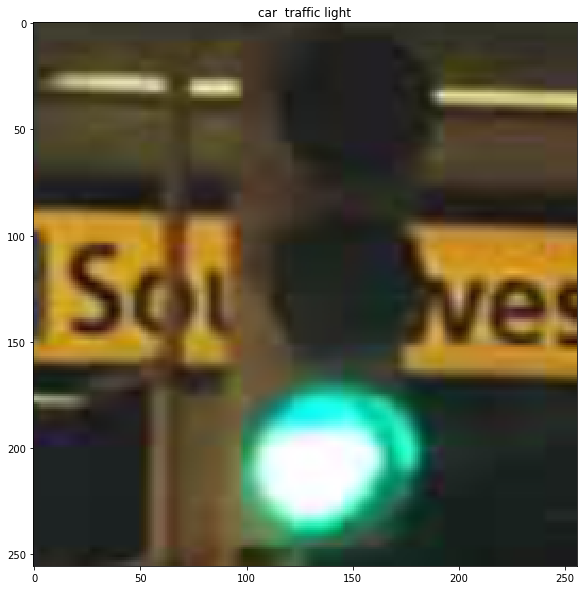

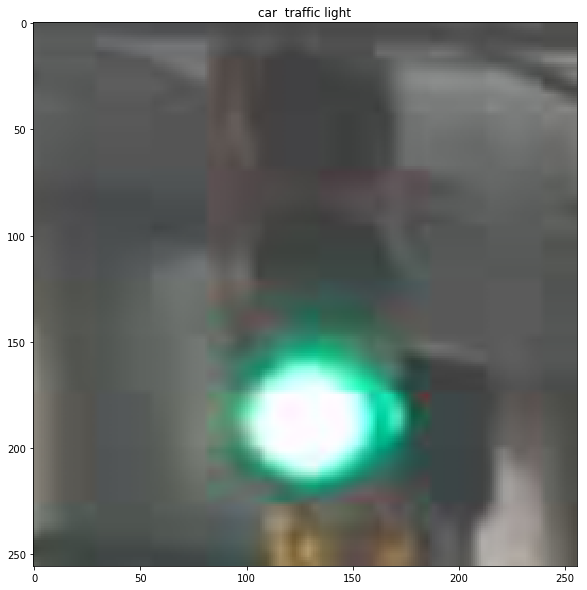

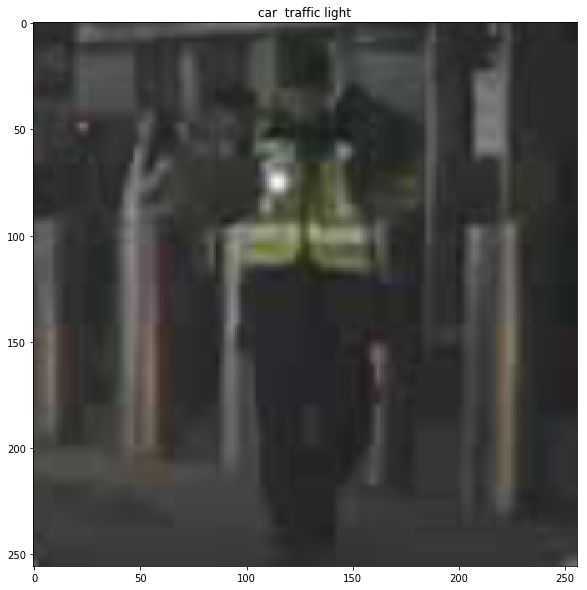

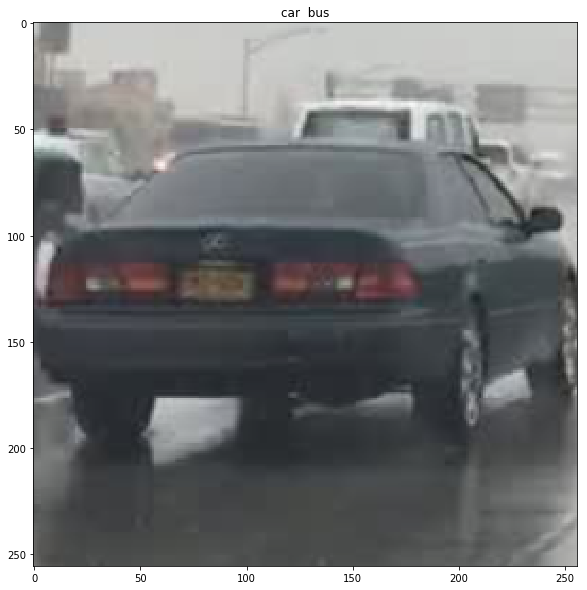

In [118]:
for i in range(20):
    plt.figure(figsize=(12,10))
    plt.title(str(mapper[l1[st+i]]) + "  " + str(mapper[yolo2[sti]]))
    plt.imshow(x1[st+i])

In [5]:
x = np.load('./4g/train_img_pixnum2000_7.npy')

In [8]:
np.max(x[0])

255

In [10]:
import matplotlib.pyplot as plt

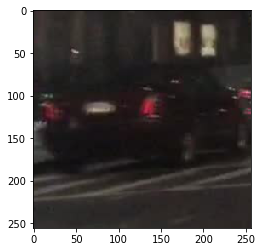

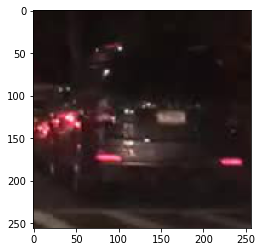

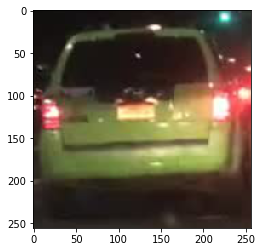

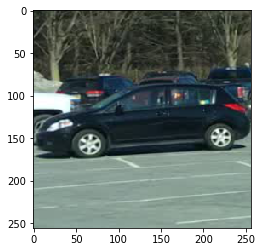

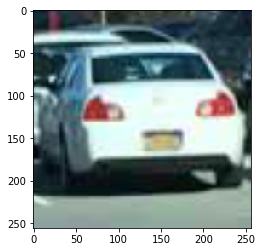

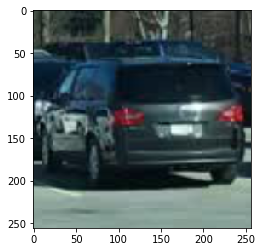

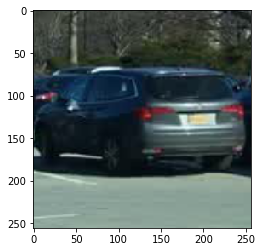

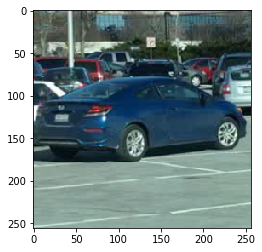

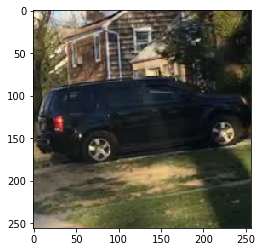

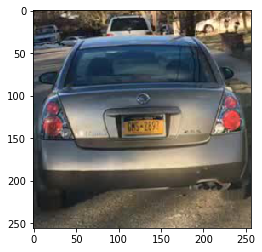

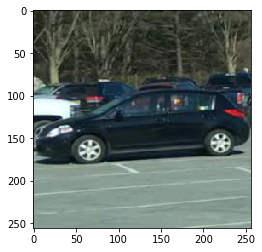

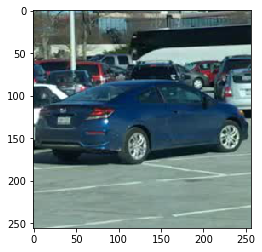

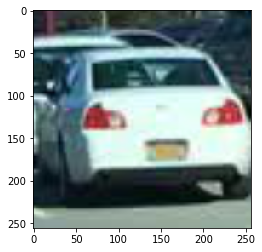

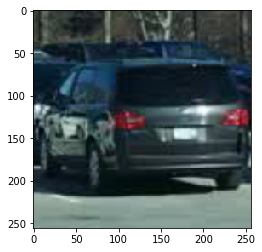

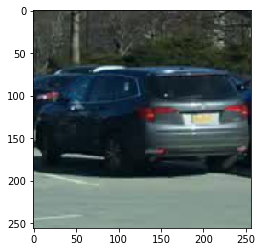

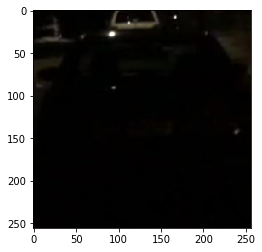

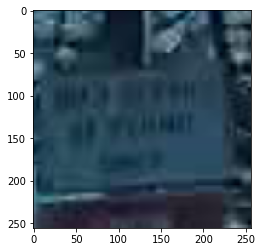

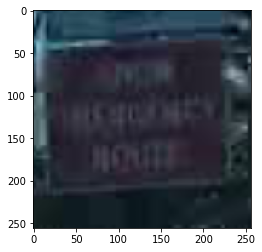

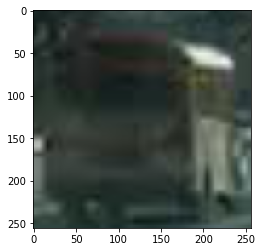

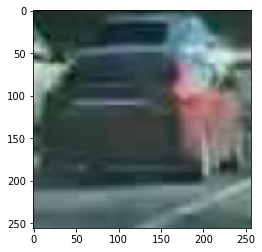

In [7]:
for i in range(0,20):
    plt.figure()
    plt.imshow(x[i])

In [77]:
x_shape = np.reshape(y, (-1, 1))

In [81]:
baylyfe =enc.fit_transform(x_shape)

In [85]:
baylyfe[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [5]:
str(datetime.datetime.now())[:10]

'2019-06-06'

In [83]:
y

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 2, 4,
       2, 2, 2, 2, 9, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6,
       7, 4, 4, 4, 2, 2, 7, 7, 6, 6, 6, 6, 6, 4, 4, 2, 2, 2, 7, 7, 2, 2,
       4, 4, 6, 7, 7, 7, 7, 7, 7, 2, 2, 2, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 4, 2, 2, 2, 7, 7, 7, 2, 2, 2, 2, 2, 4, 4, 4, 7,
       7, 6, 2, 2, 7, 6, 6, 7, 2, 2, 7, 6, 6, 7, 7, 7, 7, 7, 6, 6, 6, 7,
       7, 2, 7, 2, 2, 2, 2, 2, 7, 7, 7, 7, 2, 2, 7, 7, 7, 2, 2, 2, 2, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4,
       4, 2, 2, 2, 2, 6, 6, 6, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2,
       6, 2, 6, 7, 9, 2, 2, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 2, 7, 7, 2, 9, 7, 6, 6, 7, 7, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 2, 2, 2, 4, 2, 6, 6, 2, 2, 2, 7, 7, 7, 7, 7, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7,
       2, 7, 2, 7, 7, 7, 7, 7, 7, 2, 2, 7, 7, 7, 7,

In [51]:
kek = enc.fit(yolo)

ValueError: Expected 2D array, got 1D array instead:
array=[0 1 2 3 4 5 6 7 8 9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
252 /3 

84.0

In [12]:
(256 - 7) / 3

83.0

In [14]:
(42 - 3)

39